In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

ANALYSE EXPLORATOIRE

In [2]:
df= pd.read_csv('data.csv')
data=df._get_numeric_data().values
nomDesVariables = list(df._get_numeric_data())
df.head()

,Lat,Long,Month,Day,Year,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,18.300,-21.055,6.0,2.0,1992.0,0.482,0.055,0.059,NaN,0.085,0.016,0.029,0.017,0.007,0.188
1,20.325,-18.366,6.0,5.0,1992.0,1.248,0.000,0.277,NaN,0.248,0.061,0.332,0.064,0.106,0.039
2,20.361,-18.341,6.0,6.0,1992.0,1.517,0.000,0.206,NaN,0.234,0.065,0.636,0.056,0.207,0.030
3,20.322,-18.344,6.0,13.0,1997.0,3.363,0.000,0.000,NaN,0.137,0.035,2.057,0.085,0.000,0.048
4,18.302,-21.070,6.0,16.0,1992.0,1.325,0.000,0.192,NaN,0.288,0.053,0.336,0.152,0.032,0.174


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,9483.0,-14.152566,47.241190,-79.366667,-64.815108,-5.189000,34.007000,65.258500
Long,9483.0,-34.911445,71.528564,-179.998233,-69.619517,-64.051000,-9.210545,179.992883
Month,9483.0,5.455552,3.846315,1.000000,1.000000,5.000000,9.000000,12.000000
Day,9483.0,15.809027,8.852593,1.000000,8.000000,16.000000,23.000000,31.000000
Year,9483.0,1998.641885,4.505356,1988.000000,1995.000000,1999.000000,2002.000000,2008.000000
"Chlorophyll a, total",9484.0,1.544164,3.687959,0.000000,0.153000,0.391885,1.170462,92.413200
Divinyl chlorophyll a,3945.0,0.031781,0.088617,0.000000,0.000000,0.012417,0.041600,3.056330
Chlorophyll b,8242.0,0.057215,0.201211,0.000000,0.004000,0.017415,0.054700,9.125500
Divinyl chlorophyll b,2312.0,0.002951,0.017483,0.000000,0.000000,0.000000,0.000100,0.341000
19-Hexanoyloxyfucoxanthin,9442.0,0.180654,0.695565,-0.003200,0.024768,0.063000,0.139000,13.346127


In [4]:
df.shape

(9484, 15)

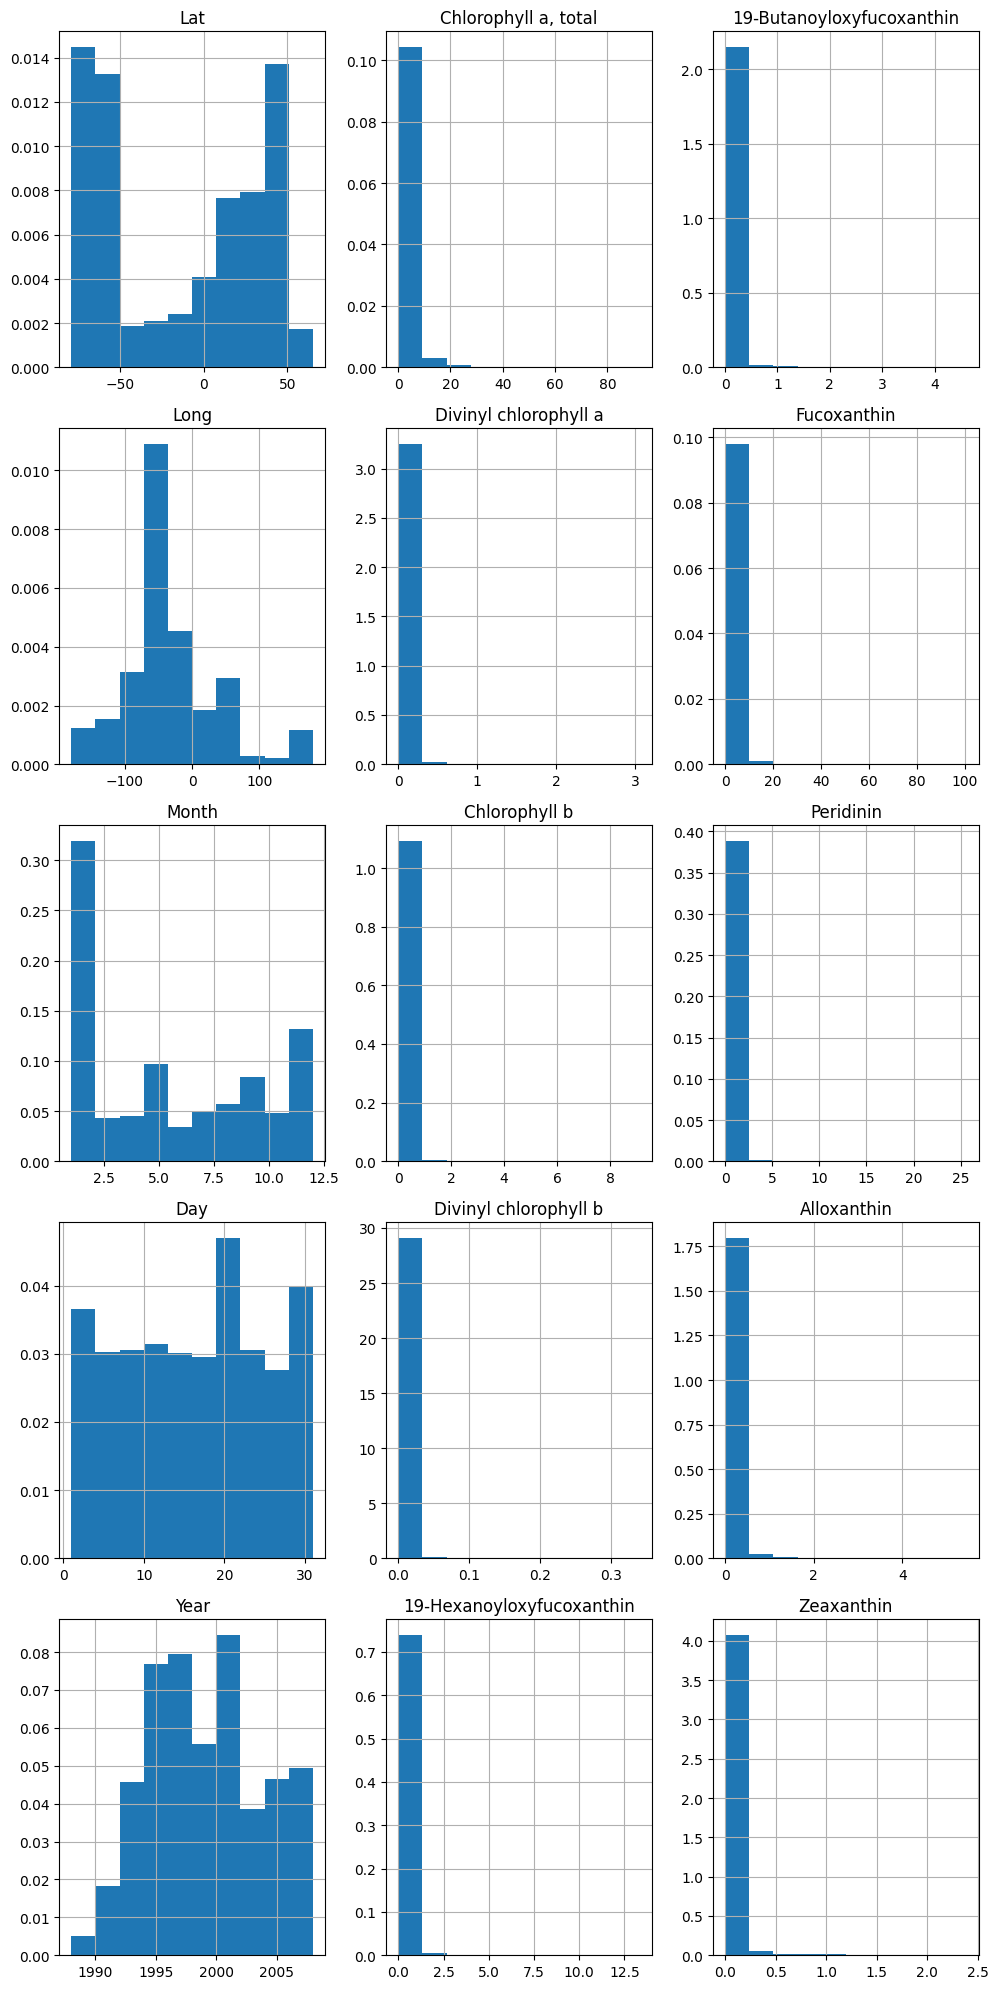

In [5]:
nbData1 = data.shape[1]
nbC = 3 ; nbL = np.ceil(nbData1/nbC).astype(int)
#fig, ax = plt.subplots(nbL,nbC)
fig, ax = plt.subplots(nbL,nbC,figsize=(10,20)) #,sharex='all', sharey='all')
for i in range(nbData1):
    #print(i%nbL,i//(nbL-1))
    ax[i%nbL,i//nbL].hist(data[:,i],density=True,align='mid')
    ax[i%nbL,i//nbL].grid(True)
    ax[i%nbL,i//nbL].set_title (nomDesVariables[i])
plt.tight_layout()

In [6]:
#fig = plt.figure(1, figsize=(30, 10))
#data = [df['Lat'],df['Long'],df['Chlorophyll a, total'], df['Divinyl chlorophyll a'], df['Chlorophyll b'], df['Divinyl chlorophyll b'],
#df['19-Hexanoyloxyfucoxanthin'], df['19-Butanoyloxyfucoxanthin'], df['Fucoxanthin'], df['Peridinin'],df['Alloxanthin'],df['Zeaxanthin']]
#plt.boxplot(data,labels=['Lat','Long','Chlorophyll a, total', 'Divinyl chlorophyll a','Chlorophyll b','Divinyl chlorophyll b',
#'19-Hexanoyloxyfucoxanthin','19-Butanoyloxyfucoxanthin','Fucoxanthin','Peridinin','Alloxanthin','Zeaxanthin'])

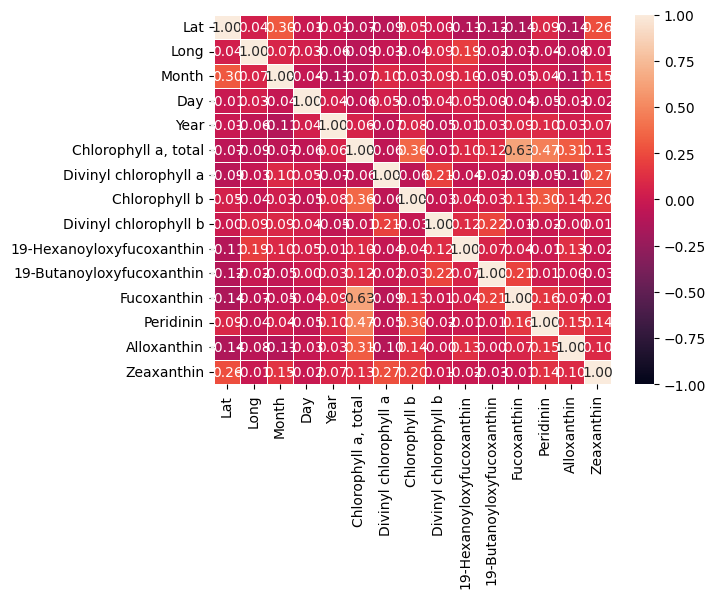

In [7]:
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

ValueError: Contour levels must be increasing

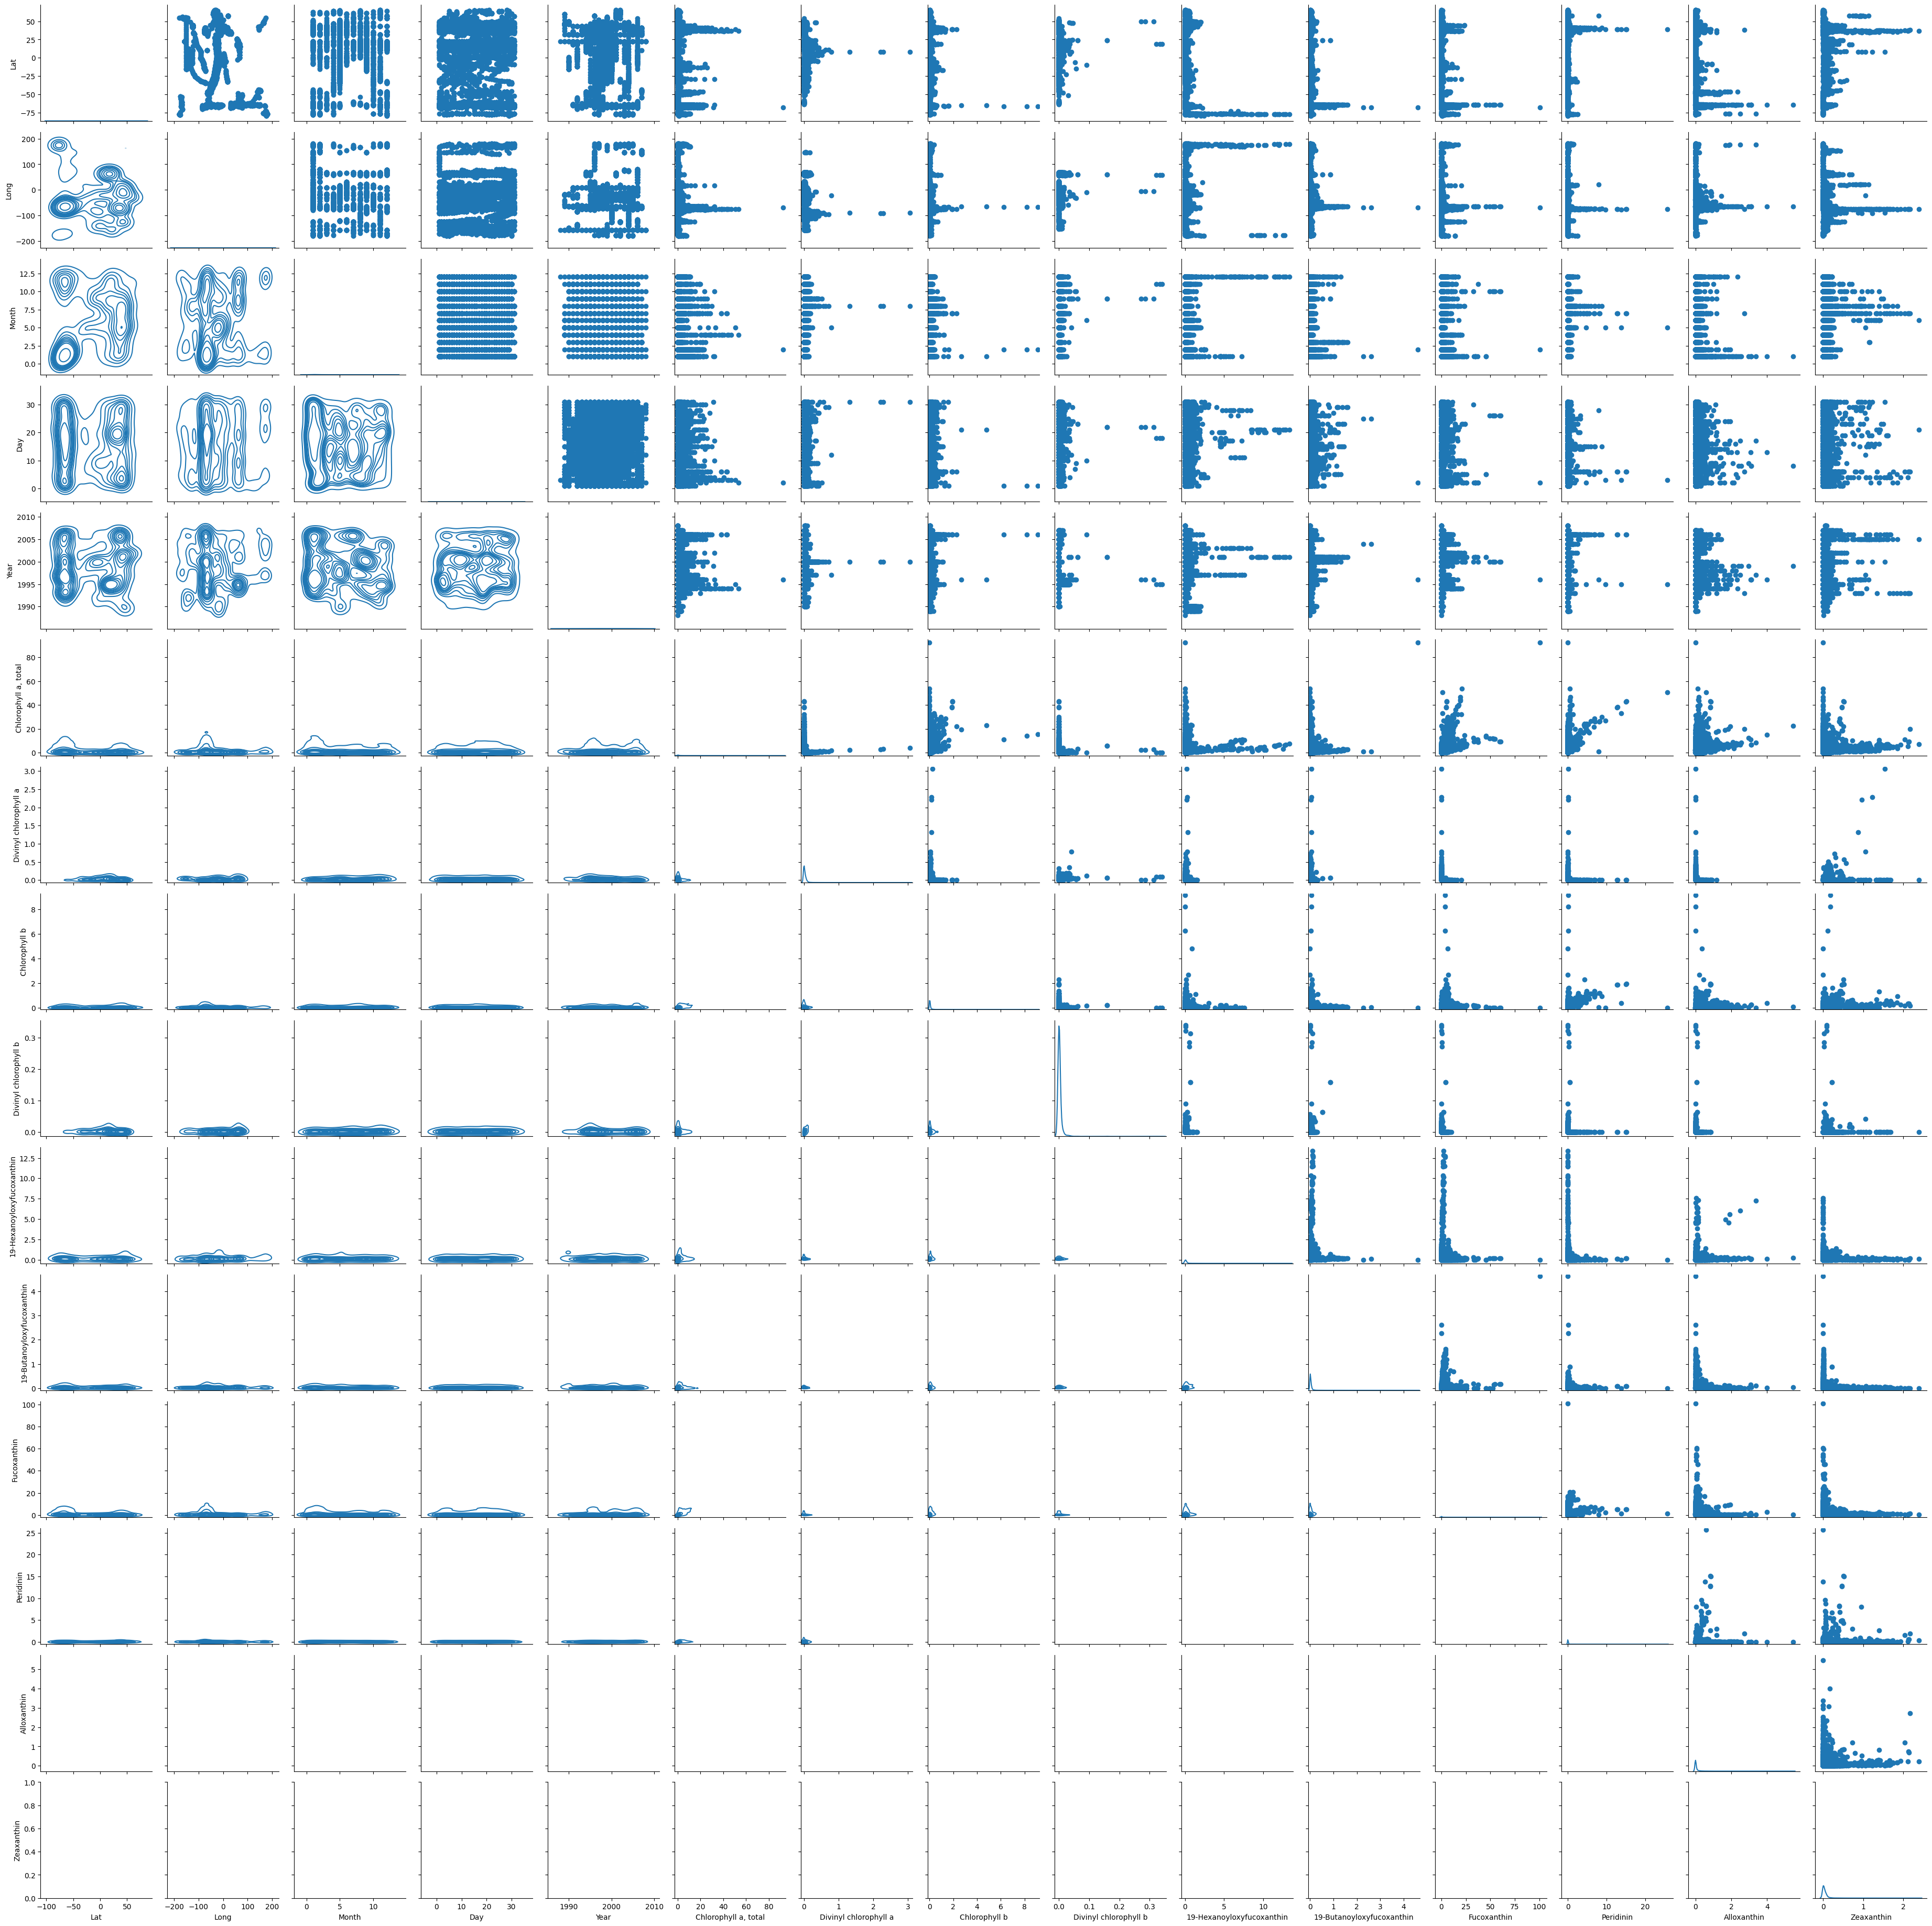

In [8]:
g = sns.PairGrid(df.iloc[:,:16])
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

NETTOYAGE ET GESTION DES DONNÉES MANQUANTES

In [ ]:
cp=df.copy()
cp

,Lat,Long,Month,Day,Year,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,18.30000,-21.05500,6.0,2.0,1992.0,0.48200,0.05500,0.0590,NaN,0.08500,0.01600,0.02900,0.01700,0.00700,0.18800
1,20.32500,-18.36600,6.0,5.0,1992.0,1.24800,0.00000,0.2770,NaN,0.24800,0.06100,0.33200,0.06400,0.10600,0.03900
2,20.36100,-18.34100,6.0,6.0,1992.0,1.51700,0.00000,0.2060,NaN,0.23400,0.06500,0.63600,0.05600,0.20700,0.03000
3,20.32200,-18.34400,6.0,13.0,1997.0,3.36300,0.00000,0.0000,NaN,0.13700,0.03500,2.05700,0.08500,0.00000,0.04800
4,18.30200,-21.07000,6.0,16.0,1992.0,1.32500,0.00000,0.1920,NaN,0.28800,0.05300,0.33600,0.15200,0.03200,0.17400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,28.68437,-19.87071,6.0,8.0,1998.0,0.03400,0.00000,0.0000,0.0,0.02120,0.00349,0.00621,0.00000,0.00000,0.01386
9480,36.30864,-17.49000,9.0,23.0,1998.0,0.05309,0.01009,0.0000,0.0,0.00790,0.00000,0.00000,0.00000,0.00000,0.03607
9481,-15.94449,-32.01183,10.0,9.0,1998.0,0.02809,0.00909,0.0000,0.0,0.00703,0.00000,0.00000,0.00000,0.00000,0.04449
9482,-29.59447,-43.23386,10.0,13.0,1998.0,0.16241,0.04541,0.0000,0.0,0.03478,0.01144,0.02664,0.00000,0.00000,0.01462


In [ ]:
del cp['Divinyl chlorophyll b']
del cp['Divinyl chlorophyll a']
del cp['Long']
del cp['Lat']
del cp['Month']
del cp['Day']
del cp['Year']

In [ ]:
print("taille cp:",cp.shape)
print("taille df:",df.shape)

taille cp: (9484, 8)
taille df: (9484, 15)


In [ ]:
#IDENTIFICATION VALEURS MANQUANTES
cp.isnull().sum()

Chlorophyll a, total            0
Chlorophyll b                1242
19-Hexanoyloxyfucoxanthin      42
19-Butanoyloxyfucoxanthin     189
Fucoxanthin                   215
Peridinin                     984
Alloxanthin                  1396
Zeaxanthin                    964
dtype: int64

In [ ]:
#NBR TOTAL VALEURS MANQUANTES
cp.isnull().sum().sum()

5032

IMPUTATION PAR LA MOYENNE

In [ ]:
#moy_df = cp.fillna(cp.mean())
#moy_df

In [ ]:
#moy_df.isnull().sum().sum()

In [ ]:
#fig = plt.figure(1, figsize=(30, 10))
#data = [moy_df['Lat'],moy_df['Long'],moy_df['Chlorophyll a, total'], moy_df['Chlorophyll b'],
#moy_df['19-Hexanoyloxyfucoxanthin'], moy_df['19-Butanoyloxyfucoxanthin'], moy_df['Fucoxanthin'], moy_df['Peridinin'],moy_df['Alloxanthin'],moy_df['Zeaxanthin']]
#plt.boxplot(data,labels=['Lat','Long','Chlorophyll a, total', 'Divinyl chlorophyll a','Chlorophyll b',
#'19-Hexanoyloxyfucoxanthin','19-Butanoyloxyfucoxanthin','Fucoxanthin','Peridinin','Alloxanthin','Zeaxanthin'])

In [ ]:
#ax = sns.heatmap(moy_df.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

IMPUTATION PAR LA MEDIANE 
MEILLEURE SI ON A DES OUTLIERS

In [ ]:
#med_df = cp.fillna(cp.median())
#med_df

In [ ]:
#med_df.isnull().sum().sum()

In [ ]:
#fig = plt.figure(1, figsize=(30, 10))
#data = [med_df['Lat'],med_df['Long'],med_df['Chlorophyll a, total'], med_df['Divinyl chlorophyll a'], med_df['Chlorophyll b'],
#med_df['19-Hexanoyloxyfucoxanthin'], med_df['19-Butanoyloxyfucoxanthin'], med_df['Fucoxanthin'], med_df['Peridinin'],med_df['Alloxanthin'],med_df['Zeaxanthin']]
#plt.boxplot(data,labels=['Lat','Long','Chlorophyll a, total', 'Divinyl chlorophyll a','Chlorophyll b',
#'19-Hexanoyloxyfucoxanthin','19-Butanoyloxyfucoxanthin','Fucoxanthin','Peridinin','Alloxanthin','Zeaxanthin'])

KNN IMPUTER

In [ ]:
dataKNN=cp.copy()

In [ ]:
dataKNN

,"Chlorophyll a, total",Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,0.48200,0.0590,0.08500,0.01600,0.02900,0.01700,0.00700,0.18800
1,1.24800,0.2770,0.24800,0.06100,0.33200,0.06400,0.10600,0.03900
2,1.51700,0.2060,0.23400,0.06500,0.63600,0.05600,0.20700,0.03000
3,3.36300,0.0000,0.13700,0.03500,2.05700,0.08500,0.00000,0.04800
4,1.32500,0.1920,0.28800,0.05300,0.33600,0.15200,0.03200,0.17400
...,...,...,...,...,...,...,...,...
9479,0.03400,0.0000,0.02120,0.00349,0.00621,0.00000,0.00000,0.01386
9480,0.05309,0.0000,0.00790,0.00000,0.00000,0.00000,0.00000,0.03607
9481,0.02809,0.0000,0.00703,0.00000,0.00000,0.00000,0.00000,0.04449
9482,0.16241,0.0000,0.03478,0.01144,0.02664,0.00000,0.00000,0.01462


In [ ]:
imputer= KNNImputer(n_neighbors=1)
imputer.fit_transform(dataKNN)
Knncp=pd.DataFrame(imputer.fit_transform(dataKNN))


In [ ]:
Knncp.isnull().sum().sum()

0

In [ ]:
pp.ProfileReport(Knncp)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ITERATIVE IMPUTER MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
cp.isnull().sum().sum()

5032

In [ ]:
dataITER=cp.copy()

In [ ]:
imp=IterativeImputer(max_iter=10, random_state=0)
imp.fit_transform(dataITER)
ITERcp=pd.DataFrame(imp.fit_transform(dataITER))

In [ ]:
ITERcp.isnull().sum().sum()

0